# Grover's Search Algorithm

We want to find a specific item in an unsorted list of $m = 2^n$ items.

Define $f(x) = 1$ `if` $x = x_0$ `else` 0

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from quantum import *
from math import log, ceil, floor
import random

target: 220 (bin = 11011100)
qubits needed 8
search space: 256
optimal iterations: 12.566370614359172

performed 12 iterations
measured 220
probability of measuring target is 99.99470%


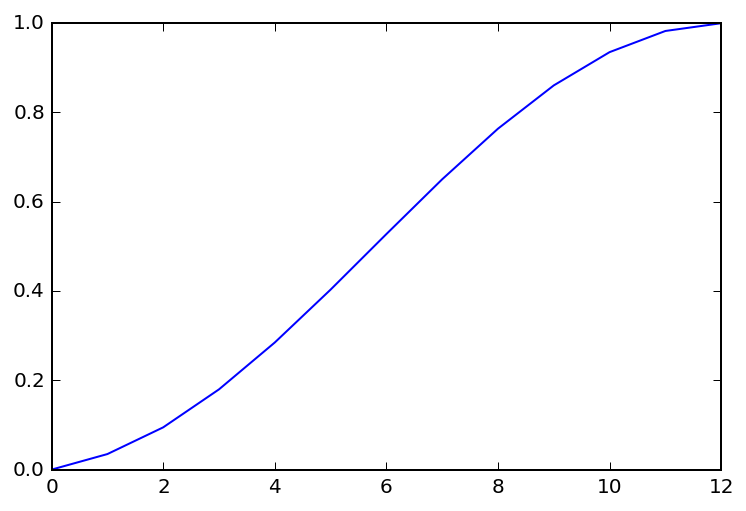

In [2]:
def grovers_plot(target=5, iterations=100):
    def func(x):
        return 1 if x == target else 0

    # We define n as the least number of bits needed to represent the target number.
    n = ceil(log(target, 2))
    # m is the number of items in the "database"
    m = 2 ** n

    # input: |00...0> (length n)
    # output: |0>
    state = Q(kron(*(zero for _ in range(n)), zero))

    # Apply HX to the output register.
    state = state.apply_gate(X, 0)
    state = state.apply_gate(H, 0)

    # Apply H^n to the input register.
    # input register: qubits 1 to n
    for i in range(1, n+1):
        state = state.apply_gate(H, i)

    # Now we enter the important Grover iteration. This is comprised of two steps:
    # 1.  Apply f(x)
    # 2.  Apply the diffusion operator (inversion about the mean)

    # First, we'll compute the diffusion operator.
    N = m
    # this definition of D (the diffusion matrix aka. inversion about the mean)
    # is given in Grover's original paper
    P = 1/N * np.ones((N,N))
    D = -np.eye(N) + 2*P
    # I assume we leave the output register untouched (hence the final I)
    D = kron(D, I)
    
    y_data = [0]

    # Now we perform the Grover iteration.
    # Should be (pi/4)*sqrt(N) iterations (Mermin, chapter 4)
    for iteration in range(iterations):
        state = state.apply_func(func)
        state = state.apply_unitary(D)
        amplitudes = to_row(state.state)
        probs = [(abs(a) ** 2).real for a in amplitudes]
        target_prob = sum(p for idx, p in enumerate(probs) if (idx >> 1) == target)
        y_data.append(target_prob)
    
    print('\nperformed {} iterations'.format(iterations))
    print('measured', state.measure()>>1)
    print('probability of measuring target is {:.5f}%'.format(100*y_data[-1]))
    
    plt.plot(range(iterations+1), y_data)
    plt.xlim(0, iterations)
    
target = 220
qubits = ceil(log(target, 2))
space_size = 2 ** qubits
iters = (np.pi/4) * sqrt(space_size).real
print('target: {0} (bin = {0:b})'.format(target))
print('qubits needed', qubits)
print('search space:', space_size)
print('optimal iterations:', iters)
grovers_plot(target=target, iterations=floor(iters))